# **Prova I - Transformadas em Sinais e Sistemas Lineares**  
**Nome**: João Vitor Garrido\
**RA**: 11201811064 

---



# **Importação dos Pacotes Utilizados**




In [1]:
# Bibliotecas Científicas e de Álgebra Linear
import sympy as sp
import numpy as np
import math

# Configurações de Visualização 
import matplotlib.pyplot as plt

# Configurações de Warnings
import warnings
warnings.filterwarnings('ignore')

# **Enunciado**




Considere o sinal de tensão no capacitor vc (t) como
a saída do circuito.
Sabendo que: \\

$$v_{c}(t)=\frac{1}{C} \int_{0}^{2} i(\tau) d \tau$$

O modelo matemático é:

$$(D + 1/RC)vc (t) = (1/RC)x(t)$$
$$ R = 0.8Ω e C = 0.1F$$

# **Itens I, II e III**

Calcule $V_c(t)$ para o sinal periódico quadrado mostrado com T0 = 4 e Ts = 1,
considere nula a carga inicial do capacitor, isto é, $V_c(0) = 0$ e obtenha os gráficos dos sinais $v(t)$, $i(t)$ e $v_c(t)$ e os espectros de amplitude e fase dos sinais obtidos


**I. Gráfico e Espectros do sinal v(t)**

In [2]:
# Atributos do sinal
T0 = 4
Ts = 1
w0 = 2*sp.pi/T0

In [3]:
# Série Trigonométrica
a0 = 2*Ts/T0; # o coeficiente a0
ak = lambda k: (2/(k*np.pi))*np.sin(k*2*np.pi*Ts/T0); # o coeficientes como função de k
bk = lambda k: 0;

In [4]:
# Série Compacta
c0 = a0; # o coeficiente c0
ck = lambda k: np.sqrt(ak(k)**2 + bk(k)**2); # o coeficente ck
thk = lambda k: -np.arctan2(bk(k), ak(k)); # o ângulo theta(k)

In [5]:
# Intervalo de observação
time = np.linspace(-T0-Ts-1, T0+Ts+1, 100)

In [6]:
# Definindo a variável tempo (t) e imaginário (j)
t = sp.symbols("t")
j = sp.I

# Definindo o sinal
trg_signal = a0
cpc_signal = c0

# Número de termos da Série de Fourier
N = 500

# Calculando para os N termos
for k in range(1, N):
  trg_signal += ak(k) * sp.cos(k*w0*t) + bk(k) * sp.sin(k*w0*t)
  cpc_signal += ck(k) * sp.cos(k*w0*t + thk(k))

In [7]:
# Transformando para relação funcional
trg_signal_λ = sp.lambdify(t, trg_signal, 
            modules=["numpy"])

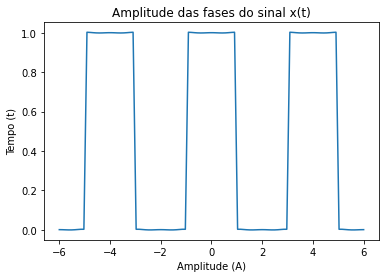

In [8]:
# Plot da função
plt.plot(time, trg_signal_λ(time));
plt.title("Amplitude das fases do sinal x(t)");
plt.xlabel("Amplitude (A)");
plt.ylabel("Tempo (t)");

In [9]:
# Atributos da Série Complexa
A = 1
signal = 1 # x(t) de T0 a Ts
k = sp.symbols("k")

# Definindo a Série Complexa
Xk = (T0)**(-1) * (sp.Integral(signal * sp.exp(-j*k*w0*t), 
                         (t, -Ts, Ts)))
Xk_solved = sp.simplify(sp.combsimp(Xk.doit()))

In [10]:
# Obtendo valores do espectro de amplitude de x(t)
range_x_ampli = np.linspace(0, 50, 50 + 1)
range_y_ampli = [abs(Xk_solved.subs(k, i)) for i in range_x_ampli]

In [11]:
# Obtendo valores do espectro de fase de x(t)
phase = lambda i: sp.atan((2*sp.im(Xk_solved.subs(k, i))) / (2*sp.re(Xk_solved.subs(k, i))))

raw_phases = [abs(phase(k)) for k in range_x_ampli]
range_y_phases = [-np.pi if phs == sp.nan else phs for phs in raw_phases]

Text(0, 0.5, 'Corrente I(t)')

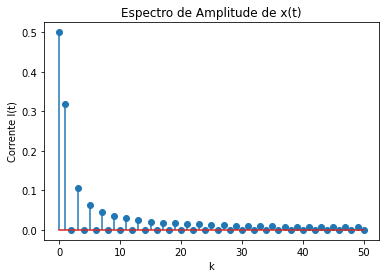

In [12]:
plt.stem(range_x_ampli, np.array(range_y_ampli, dtype=float))
plt.title("Espectro de Amplitude de x(t)")
plt.xlabel("k")
plt.ylabel("Corrente I(t)")

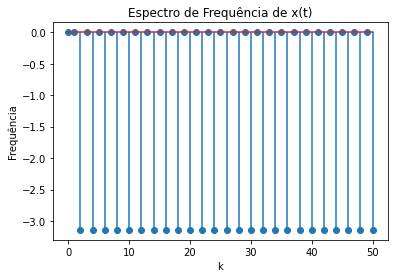

In [13]:
plt.stem(range_x_ampli, range_y_phases);
plt.title("Espectro de Frequência de x(t)");
plt.xlabel("k");
plt.ylabel("Frequência");

**II. Gráfico e Espectros do sinal i(t)**

In [14]:
# Valor Nominal das Componentes
R = 0.8
C = 0.1

In [15]:
# Resposta em Frequência
H_i = (j*k*2*sp.pi / 4 / R) / (j*k*2*sp.pi/4 + (1/(R*C)))

# Definindo Xk_til
Xk_solved_λ = sp.lambdify(k, Xk_solved,
                          modules=["numpy"])

Xk_til = Xk_solved * H_i
Xk_til_λ = sp.lambdify(k, Xk_til, 
                       modules=["numpy"])

a0_til = 0
ak_til = lambda i: 2*sp.re(Xk_til_λ(i))
bk_til = lambda i: -2*sp.im(Xk_til_λ(i))

In [16]:
N = 100;
it = a0_til

for k in range(1, N):
  it += (Xk_solved_λ(k) * ((j*k*w0/R)/ (j*k*w0+ (1/(R*C)))) * sp.exp(j*k*w0*t))

In [17]:
it_λ = sp.lambdify(t, it, modules=["numpy"])

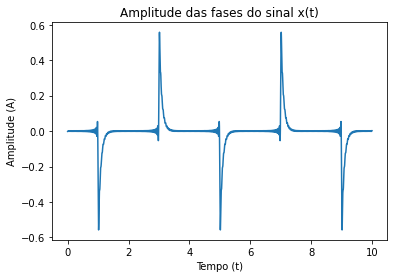

In [18]:
plt.plot(np.linspace(0, 10, 10000), it_λ(np.linspace(0, 10, 10000)));
plt.title("Amplitude das fases do sinal x(t)");
plt.xlabel("Tempo (t)");
plt.ylabel("Amplitude (A)");

In [19]:
range_y_i_ampli = [abs(Xk_til_λ(i)) for i in range_x_ampli]

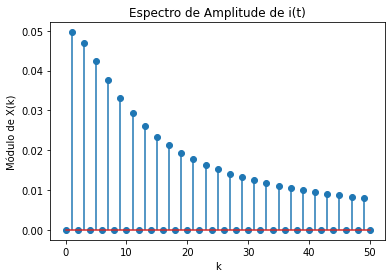

In [20]:
plt.stem(range_x_ampli, range_y_i_ampli);
plt.title("Espectro de Amplitude de i(t)");
plt.xlabel("k");
plt.ylabel("Módulo de X(k)");

In [21]:
# Obtendo valores do espectro de fase de i(t)
phase_i = lambda i: -sp.atan((2*sp.im(Xk_til_λ(i))) / (2*sp.re(Xk_til_λ(i))));

raw_phases_i = [phase_i(k) for k in range_x_ampli]
range_y_phases_i = [-np.pi if phs == sp.nan else phs for phs in raw_phases_i]

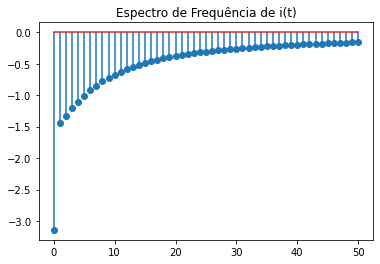

In [22]:
plt.stem(range_x_ampli, range_y_phases_i)
plt.title("Espectro de Frequência de i(t)");

**III. Gráfico e Espectros do sinal vc(t)**

In [23]:
# Modelo matemático
Enn = sp.Function("Enn") # Resposta de Entrada Nula
Esn = sp.Function("Esn") # Resposta de Estado Nulo

# Modelo Matemático
model = sp.Eq(sp.diff(Enn(t), t, 1) + (1/(R*C)) * Enn(t), 0)
model

Eq(12.5*Enn(t) + Derivative(Enn(t), t), 0)

In [24]:
# Aplicando o Impulso Unitário
dirac = sp.DiracDelta(t)
resposta = sp.dsolve(model, hint="best")

In [25]:
# Verificando a resposta do sistema
resposta

Eq(Enn(t), C1*exp(-12.5*t))

In [26]:
# Descobrindo a constante pelo lado direito da equação
constant = "C1"
equation_right_side = resposta.rhs
C1 = sp.solve(sp.Eq(equation_right_side.subs(t, 0), 1))
C1

[1]

In [27]:
# Aplicando o valor de C1 
Enn = resposta.rhs.subs(constant, C1[0])

In [28]:
# Estendendo o resultado para o modelo matemático
Esn = Enn * (1/(R*C))
Esn_solved = sp.simplify(sp.combsimp(Esn.doit()))

Esn = Esn_solved + (1/(R*C)) * dirac

In [29]:
# Verificando Resposta de Estado Nulo
Esn

12.5*DiracDelta(t) + 12.5*exp(-12.5*t)

In [30]:
# Definindo V_c pela resposta de estado nulo
τ = sp.symbols("τ")
R_Esn = sp.Integral(trg_signal.subs(t, τ)* Esn.subs(t, t-τ), (τ, 0, t))

In [31]:
# Integrando no Intervalo Definido
ans_R_Esn = R_Esn.doit()

In [32]:
# Transformando V_t para relação funcional
V_t = sp.lambdify(t, ans_R_Esn,
                  modules=[{"Heaviside": lambda u: np.heaviside(u, 0)}, "numpy"])

Text(0, 0.5, 'Amplitude (A)')

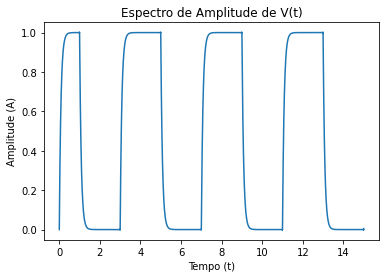

In [33]:
# Definindo um Intervalo de Observação
range_x_obs = np.linspace(0, 15, 10000)

# Plotando o gráfico
plt.plot(range_x_obs, V_t(range_x_obs))
plt.title("Espectro de Amplitude de V(t)");
plt.xlabel("Tempo (t)")
plt.ylabel("Amplitude (A)")

## **Item IV** ##
Repita o exercício anterior para o sinal de entrada com $A = 2$, $T_o = 5$, $T_H = 2$ e
$T_L = 3$

In [34]:
# Condições inicias do sistema
T0 = 5
Th = 2
Tl = 3
Ts = 2
w0 = 2*sp.pi/T0
signal = 2 # Observando no intervalo T0 Ts
A = 2

# Definindo os Simbolos
k = sp.symbols("k")
t = sp.symbols("t")
j = sp.I

In [35]:
# Definindo Xk para as novas condições iniciais
Xk = (1/T0) * sp.Integral(signal * sp.exp(-j*k*w0*t), (t, 0, Ts))

In [36]:
# Solução de Xk
Xk_solved = sp.simplify(sp.combsimp(Xk.doit()))

In [37]:
# Visualizando a solução de Xk
Xk_solved

Piecewise((1.0*I*(-1 + exp(-4*I*pi*k/5))/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (0.8, True))

In [38]:
Xk_solved_λ = sp.lambdify(k, Xk_solved,
                          modules=["numpy"])

In [39]:
trg_signal = Xk_solved_λ(0).tolist()

for i in range(1,100):
  trg_signal += (2*sp.re(Xk_solved_λ(i).tolist())*sp.cos(k*w0*t) - 2*sp.im(Xk_solved_λ(i).tolist())*sp.sin(k*w0*t)).subs(k, i)

In [40]:
# Transformando o sinal para a forma funcional
signal_λ = sp.lambdify(t, 
                    trg_signal, modules=['numpy'])

In [41]:
# Definindo range de observação
range_x_ampli = np.linspace(-2*T0, 2*T0, 1000)

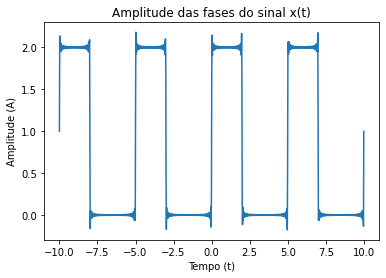

In [42]:
# Plotando o gráfico
plt.plot(range_x_ampli, signal_λ(range_x_ampli))
plt.title("Amplitude das fases do sinal x(t)");
plt.xlabel("Tempo (t)");
plt.ylabel("Amplitude (A)");

In [43]:
# Definindo a Série Complexa
Xk = (T0)**(-1) * (sp.Integral(signal * sp.exp(-j*k*w0*t), 
                         (t, 0, Ts)))
Xk_solved = sp.simplify(sp.combsimp(Xk.doit()))

In [44]:
Xk_solved_λ = sp.lambdify(k, Xk_solved,
                         modules=["numpy"])

In [45]:
# Obtendo valores do espectro de amplitude de x(t)
range_x_ampli = np.linspace(0, 50, 50 + 1)
range_y_ampli = [abs(Xk_solved_λ(i)) for i in range_x_ampli]

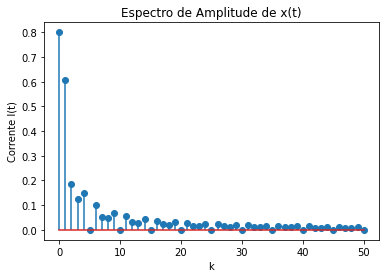

In [46]:
plt.stem(range_x_ampli, range_y_ampli)
plt.title("Espectro de Amplitude de x(t)");
plt.xlabel("k");
plt.ylabel("Corrente I(t)");

In [47]:
# Obtendo valores do espectro de fase de x(t)
phase = lambda i: sp.atan((2*sp.im(Xk_solved_λ(i).tolist())) / (2*sp.re(Xk_solved_λ(i).tolist())))

raw_phases = [phase(k) for k in range_x_ampli]
range_y_phases = [-np.pi if phs == sp.nan else phs for phs in raw_phases]

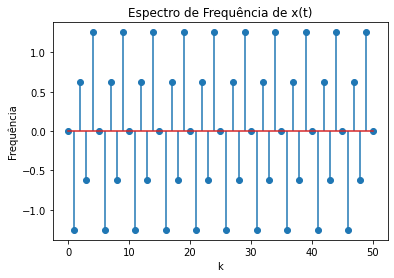

In [48]:
plt.stem(range_x_ampli, np.array(range_y_phases, dtype=float));
plt.title("Espectro de Frequência de x(t)");
plt.xlabel("k");
plt.ylabel("Frequência");